# Hanning filter GPU vs CPU Fortran vs JAX

In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


## Load files

In [3]:
jax_results = xr.open_dataset('/mnt/summer/DATA_MEOM/workdir/ABL1D-JAX/jax_hanning_cpu_loopy.nc')
jax_results

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    blh_smoox  (latitude, longitude) float32 4MB ...
    msk        (latitude, longitude) float32 4MB ...

In [5]:
fortran_results = xr.open_dataset('/mnt/summer/DATA_MEOM/workdir/ABL1D-JAX/smooth.nc')
fortran_results = fortran_results.isel(time_counter=0)
fortran_results = fortran_results.assign_coords({
    'y' :jax_results.latitude.values,
    'x' :jax_results.longitude.values,
}).rename({'y':'latitude','x':'longitude'})
fortran_results

<xarray.Dataset> Size: 17MB
Dimensions:       (latitude: 721, longitude: 1440)
Coordinates:
  * latitude      (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude     (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
Data variables:
    degraded_blh  (latitude, longitude) float64 8MB ...
    lsm           (latitude, longitude) float64 8MB ...

## Plot

In [6]:
vmin, vmax = 0, 3000

### JAX code on CPU

Text(0.5, 1.0, 'JAX')

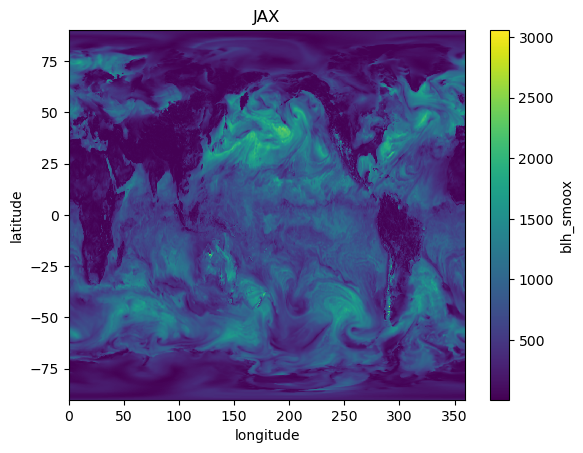

In [7]:
ax = plt.axes()
jax_results.blh_smoox.plot(ax=ax)
ax.set_title('JAX')

Text(0.5, 1.0, 'JAX mask')

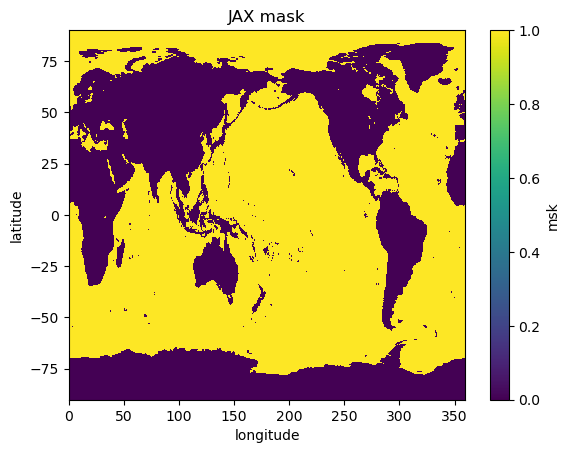

In [8]:
ax = plt.axes()
jax_results.msk.plot(ax=ax)
ax.set_title('JAX mask')

### Fortran code

Text(0.5, 1.0, 'Fortran')

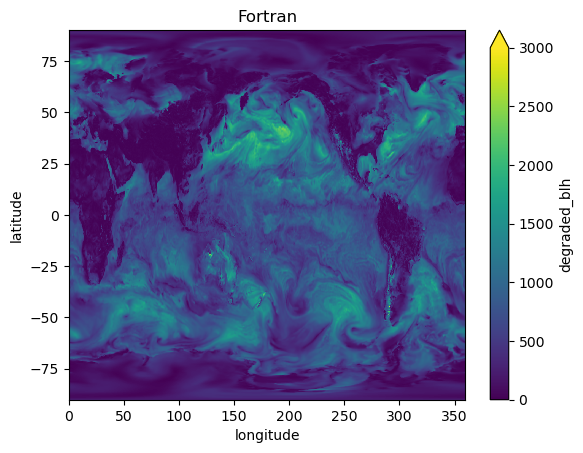

In [9]:
ax = plt.axes()
fortran_results.degraded_blh.plot(ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('Fortran')

Text(0.5, 1.0, 'Fortran mask field')

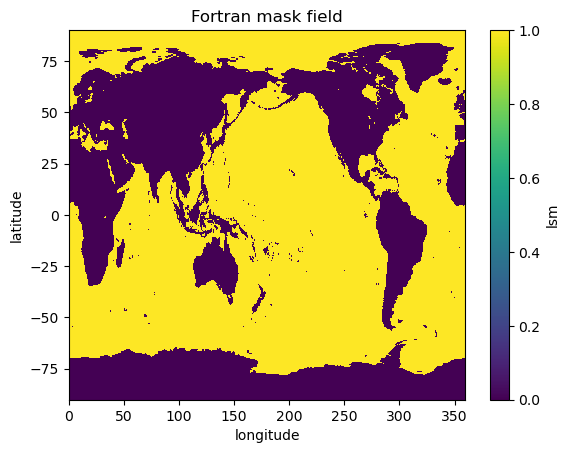

In [10]:
ax = plt.axes()
fortran_results.lsm.plot(ax=ax, vmin=vmin)
ax.set_title('Fortran mask field')

### Fortran mask vs Python mask

Text(0.5, 1.0, 'Fortran mask - JAX mask')

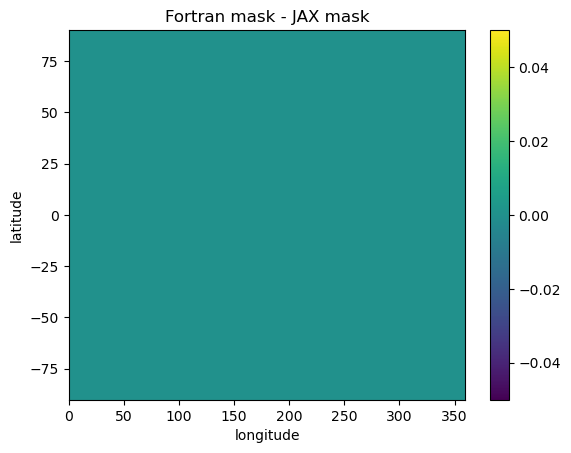

In [11]:
ax = plt.axes()
diff = fortran_results.lsm - jax_results.msk
diff.plot(ax=ax)#, vmin=-1, vmax=1)
ax.set_title('Fortran mask - JAX mask')

### Fortran vs JAX

Text(0.5, 1.0, 'Fortran - JAX')

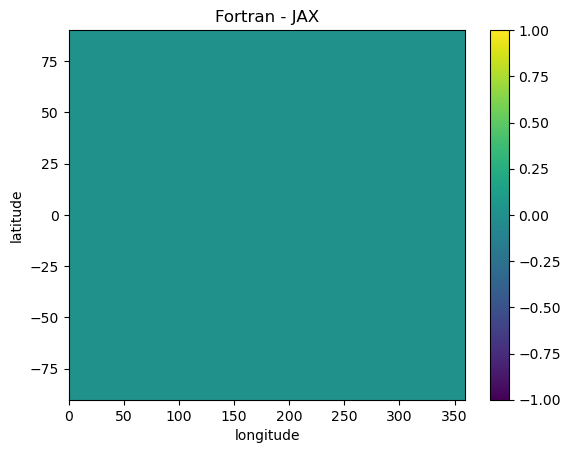

In [12]:
ax = plt.axes()
diff = fortran_results.degraded_blh - jax_results.blh_smoox
diff.plot(ax=ax, vmin=-1, vmax=1)
ax.set_title('Fortran - JAX')

In [13]:
diff = fortran_results.degraded_blh - jax_results.blh_smoox
print(f'max diff ={diff.max().values}, min diff = {diff.min().values}')

max diff =0.0, min diff = 0.0


They are the same!